# 서포트 백터 머신 
    - 새로운 데이터가 입력되었을때 기존 데이터를 활용해 분류하는 방법 
    - 패턴 인식, 자료 분석 등을 위한 지도 학습 모델로 회귀와 분류 문제 해결에 사용이 되는 알고리즘 

- 매개변수 
    - C
        - 기본값 : 1.0 
        - 규제의 강도의 역수
        - 숫자가 크면 -> 오차를 허용하지 않는다 (과적합 위험)
        - 숫자가 작으면 -> 오차를 어느정도 허용(일반화 위험)
    - kernel (커널 함수의 종류)
        - 기본값 : "rbf"
        - 실제의 데이터가 선형이 아닌 경우 커널 함수를 이용하여 데이터를 고차원 공간으로 매핑하여 직선으로 구분을 가능하게 하는 방법 
        - "linear" : 선형 SVM
        - "poly" : 다항식 커널
        - 'rbf' : 가우시안 커널(가장 많이 사용)
        - "sigmoid" : 시그모이드 함수 기반 
    - gamma
        - 커널 계수
        - 'linear' 제외한 커널이 선택되었을때 사용
        - 크면 -> 경계가 복잡해짐 (과적합 위험)
        - 작으면 -> 경계가 유연해짐 (일반화 위험)
    - degree
        - 기본값 : 3
        - 다항식 커널의 차수 
        - 비선형 데이터의 패턴을 학습할수 있게 해주는 변수 
    - probability
        - 기본값 : False
        - 확률 출력의 여부 -> True인 경우 predict_proba() 함수를 사용 가능 
        - 학습할때 속도가 느려짐 
- 주요 속성
    - support_ 
        - 서포트 백터의 인덱스의 값
        - 전체의 데이터에서 경계선에 딱 붙어 있는 데이터의 인덱스 값
    - support_vectors_
        - support_ 위치(인덱스)의 값이라면 그 값에 해당하는 실제 데이터 값
    - n_support_
        - 클래스(컬럼)별 서포트 백터의 개수 
    - coef_
        - 결정 경계의 계수 (linear 커널인 경우에만 사용 가능)
- 메서드 
    - fit(x, y) : 학습
    - predict(x) : 예측
    - predict_proba(x) : 예측 확률(probability의 값이 True인 경우)
    - decision_function(x) : 결정 함수의 값(margin과의 거리)
    - score(x, y) : 정확도 평가 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
    recall_score, f1_score

In [2]:
df = pd.read_csv("../data/classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


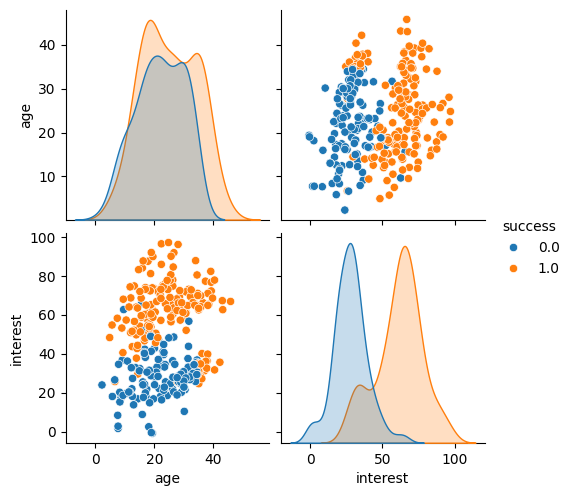

In [4]:
# 데이터 클래스 분포를 그래프 확인 
sns.pairplot(
    data = df, 
    hue = 'success'
)

In [5]:
# 데이터의 분할 train, test
x = df[['age', 'interest']].values
y = df['success'].values

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, 
    test_size=0.3, stratify=y, 
    random_state=42
)

In [6]:
# 스케일러 사용 
# SVM은 각각 특성(컬럼)의 스케일에 매우 민감하기 때문에 스케일링 필요 
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)